In [5]:
import platform
import tensorflow as tf
import torch
import os

# Cek versi Python
print("Python Version:", platform.python_version())

# Cek GPU yang tersedia
gpu_info = tf.config.list_physical_devices('GPU')
if gpu_info:
    print("\nGPU TensorFlow Info:")
    print(tf.config.experimental.get_device_details(gpu_info[0]))
else:
    print("\nNo GPU available for TensorFlow.")

# Cek GPU untuk PyTorch
if torch.cuda.is_available():
    print("\nPyTorch GPU Info:")
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("GPU Memory:", f"{torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("\nNo GPU available for PyTorch.")

# Cek informasi perangkat keras lainnya
print("\nHardware Info:")
print("Number of CPUs:", os.cpu_count())


Python Version: 3.11.11

GPU TensorFlow Info:
{'compute_capability': (7, 5), 'device_name': 'Tesla T4'}

PyTorch GPU Info:
GPU Name: Tesla T4
GPU Memory: 15.83 GB

Hardware Info:
Number of CPUs: 2


In [6]:
!pip install ultralytics

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EY2pDRbKs0yScLZ5S4ks")
project = rf.workspace("shootdetectoryolo").project("deteksi-shooting-basket")
version = project.version(11)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

# Memuat model YOLOv8m
model = YOLO("yolov8m.pt")  # Model base, bisa diganti ke yolov8s.pt atau lainnya

# Melatih model dengan perubahan pada learning rate dan momentum
results = model.train(
    data="/content/Deteksi-Shooting-basket-11/data.yaml",  # Path dataset YAML
    epochs=100,                                             # Default: 100
    imgsz=640,                                              # Default: 640
    lr0=0.01,                                              # TUNED: Learning rate awal (default: 0.01)
    momentum=0.937,                                         # TUNED: Momentum (default: 0.937)
    save=True,                                              # Simpan model
    save_period=10,                                         # Simpan tiap 10 epoch
    name="yolov8m_tuned_lr0.01_m0.937"                      # Nama proyek/eksperimen
)

# Simpan model hasil pelatihan (opsional, untuk backup)
model.save("yolov8m_Default_Data Baru.pt")


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Deteksi-Shooting-basket-11/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=yolov8m_tuned_lr0.01_m0.937, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning /content/Deteksi-Shooting-basket-11/train/labels.cache... 438 images, 0 backgrounds, 0 corrupt: 100%|██████████| 438/438 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Deteksi-Shooting-basket-11/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8m_tuned_lr0.01_m0.937/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_tuned_lr0.01_m0.937
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.93G      1.141       3.66      1.064         11        640: 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        123        182      0.739      0.563      0.604      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.93G      1.084      1.206      1.048         16        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        182     0.0318       0.21    0.00998    0.00583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.93G      1.061      1.068      1.079          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        123        182   2.74e-05     0.0132   1.58e-05   3.99e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.93G      1.156      1.144      1.122         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        182          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.93G      1.042     0.8771      1.064         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.942      0.583      0.697       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.93G       1.06     0.8168      1.099         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        123        182      0.565      0.202      0.216      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.93G      1.009     0.8042       1.06          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        123        182   0.000114    0.00658   6.15e-05   2.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.93G     0.9704     0.8042       1.03         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        123        182      0.791      0.726      0.733      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.93G     0.9172     0.7011      1.012         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        123        182      0.848      0.788      0.823      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.93G      0.979     0.7966      1.033          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        123        182      0.882      0.744      0.809      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.99G     0.9004     0.6595     0.9981         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.907      0.785      0.826      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.05G     0.9305     0.6857      1.012         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182       0.89      0.681      0.765      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.05G     0.9309     0.7194       1.02         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        123        182       0.89      0.766      0.829      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.05G     0.9031      0.699      1.007         15        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        123        182      0.908      0.776      0.844      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.05G     0.8737     0.6842     0.9993         20        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        123        182      0.846       0.76      0.809      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.05G      0.867     0.6378     0.9747         15        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.878      0.845      0.871      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.05G      0.845      0.628      0.973         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        123        182      0.474      0.618      0.343      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.05G     0.8492     0.6073     0.9842         14        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        182      0.898      0.779      0.845      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.05G     0.8411     0.5787     0.9693         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.935      0.678      0.779      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.05G     0.8384     0.5558     0.9775         17        640: 100%|██████████| 28/28 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        123        182      0.908      0.815       0.86      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.05G     0.8414     0.5752     0.9736         15        640: 100%|██████████| 28/28 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.903      0.832      0.891      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.05G      0.819      0.563     0.9684         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        182      0.868       0.83      0.839      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.05G      0.849     0.5429     0.9569         18        640: 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        123        182      0.936      0.817      0.885      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.05G      0.803     0.5377     0.9688          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        123        182      0.895      0.876      0.881      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.05G     0.8149      0.558     0.9731         15        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        182      0.902       0.81      0.848      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.09G     0.7965     0.5313     0.9512         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        123        182        0.9      0.743      0.784      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.16G     0.8245     0.5349     0.9652         15        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.892      0.808       0.83      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.22G     0.8054     0.5806     0.9616          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.925       0.79      0.872      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.22G     0.7491     0.4866     0.9415          6        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        123        182      0.928      0.779      0.864      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.22G     0.7878     0.5307     0.9572         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        123        182       0.97      0.786      0.896      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.22G       0.77     0.4957     0.9454         15        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        182      0.919      0.771       0.86      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.22G     0.7455     0.4789     0.9362         17        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        123        182      0.932      0.802      0.875      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.22G     0.7573     0.5057     0.9468         16        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        123        182      0.889      0.821      0.868      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.22G     0.7578     0.5001     0.9616         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.934      0.805       0.88      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.22G     0.7244      0.466     0.9185         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        123        182      0.921      0.823      0.881      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.22G     0.7611     0.5116       0.95         14        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        123        182      0.884      0.812      0.856      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.22G      0.717     0.4466     0.9152         18        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        182      0.944      0.815      0.876      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.22G       0.73     0.4819     0.9363         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        123        182      0.926      0.841      0.895      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.22G     0.7373     0.4556     0.9251         15        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.929      0.874      0.905      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.22G     0.6977      0.445     0.9333         18        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        123        182      0.945      0.821      0.872      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.22G      0.694     0.4289     0.9143         15        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182       0.93       0.84       0.88      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.22G     0.7101     0.4305     0.9166         13        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        182      0.895      0.874      0.895      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.22G     0.7207     0.4393     0.9345          7        640: 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        123        182      0.892      0.867      0.892      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.22G     0.7243     0.4801     0.9347         13        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.891      0.804      0.868      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.22G     0.7312     0.4494     0.9149          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.927      0.815      0.853      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.22G     0.7117     0.4374      0.922         14        640: 100%|██████████| 28/28 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        123        182      0.902      0.854      0.882      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.22G     0.6854      0.424     0.9136         14        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        123        182      0.844      0.883      0.883      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.23G     0.6883     0.4151     0.9162         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        182      0.925      0.841      0.889      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.23G     0.6949      0.435      0.924         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        123        182      0.941      0.857      0.899      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.23G     0.7126     0.4247     0.9353          5        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.931      0.879      0.907      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.23G     0.6917      0.423     0.8993         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        123        182      0.974      0.788      0.886       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.23G     0.6823     0.4026     0.8971          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        182      0.917      0.856      0.899      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.23G     0.7005     0.4241     0.9142         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        123        182      0.905      0.835      0.883      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.23G     0.6851     0.3939     0.9106          7        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182       0.93      0.841        0.9      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.23G     0.7034     0.4409     0.9194          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.888      0.874      0.909      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.23G     0.6897     0.4306     0.9338         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.918      0.861      0.915        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.23G     0.6797     0.4044     0.9027          6        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        123        182      0.943      0.834      0.899       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.23G      0.635     0.3816       0.89          7        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        123        182      0.905      0.844      0.904       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.23G     0.6652     0.4049     0.9003         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        182        0.9      0.849      0.909      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.23G     0.6556     0.4039     0.8973          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        123        182      0.913       0.86      0.898      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.23G     0.6417     0.3992      0.898         18        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.939      0.856      0.883      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.23G     0.6455     0.3808     0.8967         16        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        123        182        0.9      0.877      0.909      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.23G     0.6405     0.3865     0.8901         14        640: 100%|██████████| 28/28 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.908      0.864      0.897      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.23G     0.6215     0.3836     0.8715          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        123        182      0.899      0.893      0.909      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.23G     0.6207     0.3601     0.9075         13        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        123        182      0.875      0.875        0.9      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.23G     0.6095     0.3874     0.8966         18        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        182      0.917      0.886      0.916       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.23G     0.6195     0.3727      0.891         19        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        123        182      0.945      0.879       0.92      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.23G     0.6043     0.3425     0.8925         16        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        182       0.96      0.866      0.912      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.23G     0.6171     0.3759     0.9044         18        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        182      0.958      0.841      0.909        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.23G     0.6155     0.3787     0.8866          6        640: 100%|██████████| 28/28 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.944      0.872      0.913      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.23G      0.635     0.3728     0.8991         13        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        123        182      0.876      0.874      0.904      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.23G     0.6001     0.3574     0.8805          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        182      0.902      0.854      0.902      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.23G     0.6154     0.3783     0.9006         19        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        123        182      0.906      0.838      0.885      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.23G     0.6087       0.36     0.8952          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        182      0.887      0.854      0.894      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.23G     0.6005     0.3567     0.9071          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        182      0.928      0.855       0.91      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.23G     0.5822     0.3227     0.8723         16        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        123        182       0.95      0.852      0.902      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.23G     0.5927     0.3537     0.8774         20        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        123        182      0.932      0.835      0.897      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.23G     0.6112     0.3567     0.8847         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.977      0.835      0.909      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.23G     0.5682     0.3418     0.8777         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.924      0.874      0.915      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.23G     0.5577     0.3335     0.8709          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        182      0.953      0.861      0.925      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.23G     0.5855     0.3462     0.8793         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        123        182       0.94      0.875      0.929      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.23G     0.5394     0.3266     0.8732         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        182      0.922      0.881       0.92      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.23G     0.5711     0.3247     0.8681          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        123        182      0.919      0.881       0.91      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.23G      0.563     0.3315     0.8727         12        640: 100%|██████████| 28/28 [00:15<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        123        182      0.921      0.881      0.923      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.23G     0.5473     0.3207     0.8799         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.907      0.894      0.924      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.23G     0.5885     0.3384     0.8872         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        123        182      0.934      0.879      0.921      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.23G     0.5894      0.343     0.8907         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.921      0.855      0.905      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.23G     0.5225     0.3162     0.8697         14        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        123        182      0.939      0.854      0.916       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.23G     0.5511     0.3118     0.8765         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.935      0.874      0.931      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.23G     0.5638     0.3215     0.8755          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        123        182      0.935      0.877      0.917      0.705


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.23G     0.5431     0.3057     0.8667         10        640: 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        123        182      0.918      0.874      0.917      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.23G     0.5139     0.2972      0.876          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.926      0.874      0.923      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.23G     0.5314     0.2992     0.8789         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        123        182      0.937      0.874      0.919      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.23G     0.5275     0.3035     0.8703          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        182      0.914       0.89      0.909      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.23G     0.5171     0.2939     0.8663          8        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        123        182      0.915      0.896      0.909      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.23G     0.5062     0.2885     0.8594         12        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        123        182      0.908      0.886      0.915      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.23G     0.5144      0.287     0.8655         11        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        182      0.926      0.876      0.915        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.23G     0.5184     0.2795     0.8721          6        640: 100%|██████████| 28/28 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        123        182      0.926       0.88      0.914      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.23G     0.4938     0.2802     0.8552         10        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        123        182      0.921       0.88      0.913      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.23G     0.5141     0.2717     0.8594          9        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        123        182      0.946      0.844      0.911      0.705



100 epochs completed in 0.511 hours.
Optimizer stripped from runs/detect/yolov8m_tuned_lr0.01_m0.937/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_tuned_lr0.01_m0.937/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_tuned_lr0.01_m0.937/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


                   all        123        182      0.926      0.874      0.923      0.714
            Basketball         76         76      0.868      0.776      0.858      0.555
       Basketball Hoop        106        106      0.985      0.972      0.987      0.874
Speed: 0.3ms preprocess, 11.2ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/yolov8m_tuned_lr0.01_m0.937


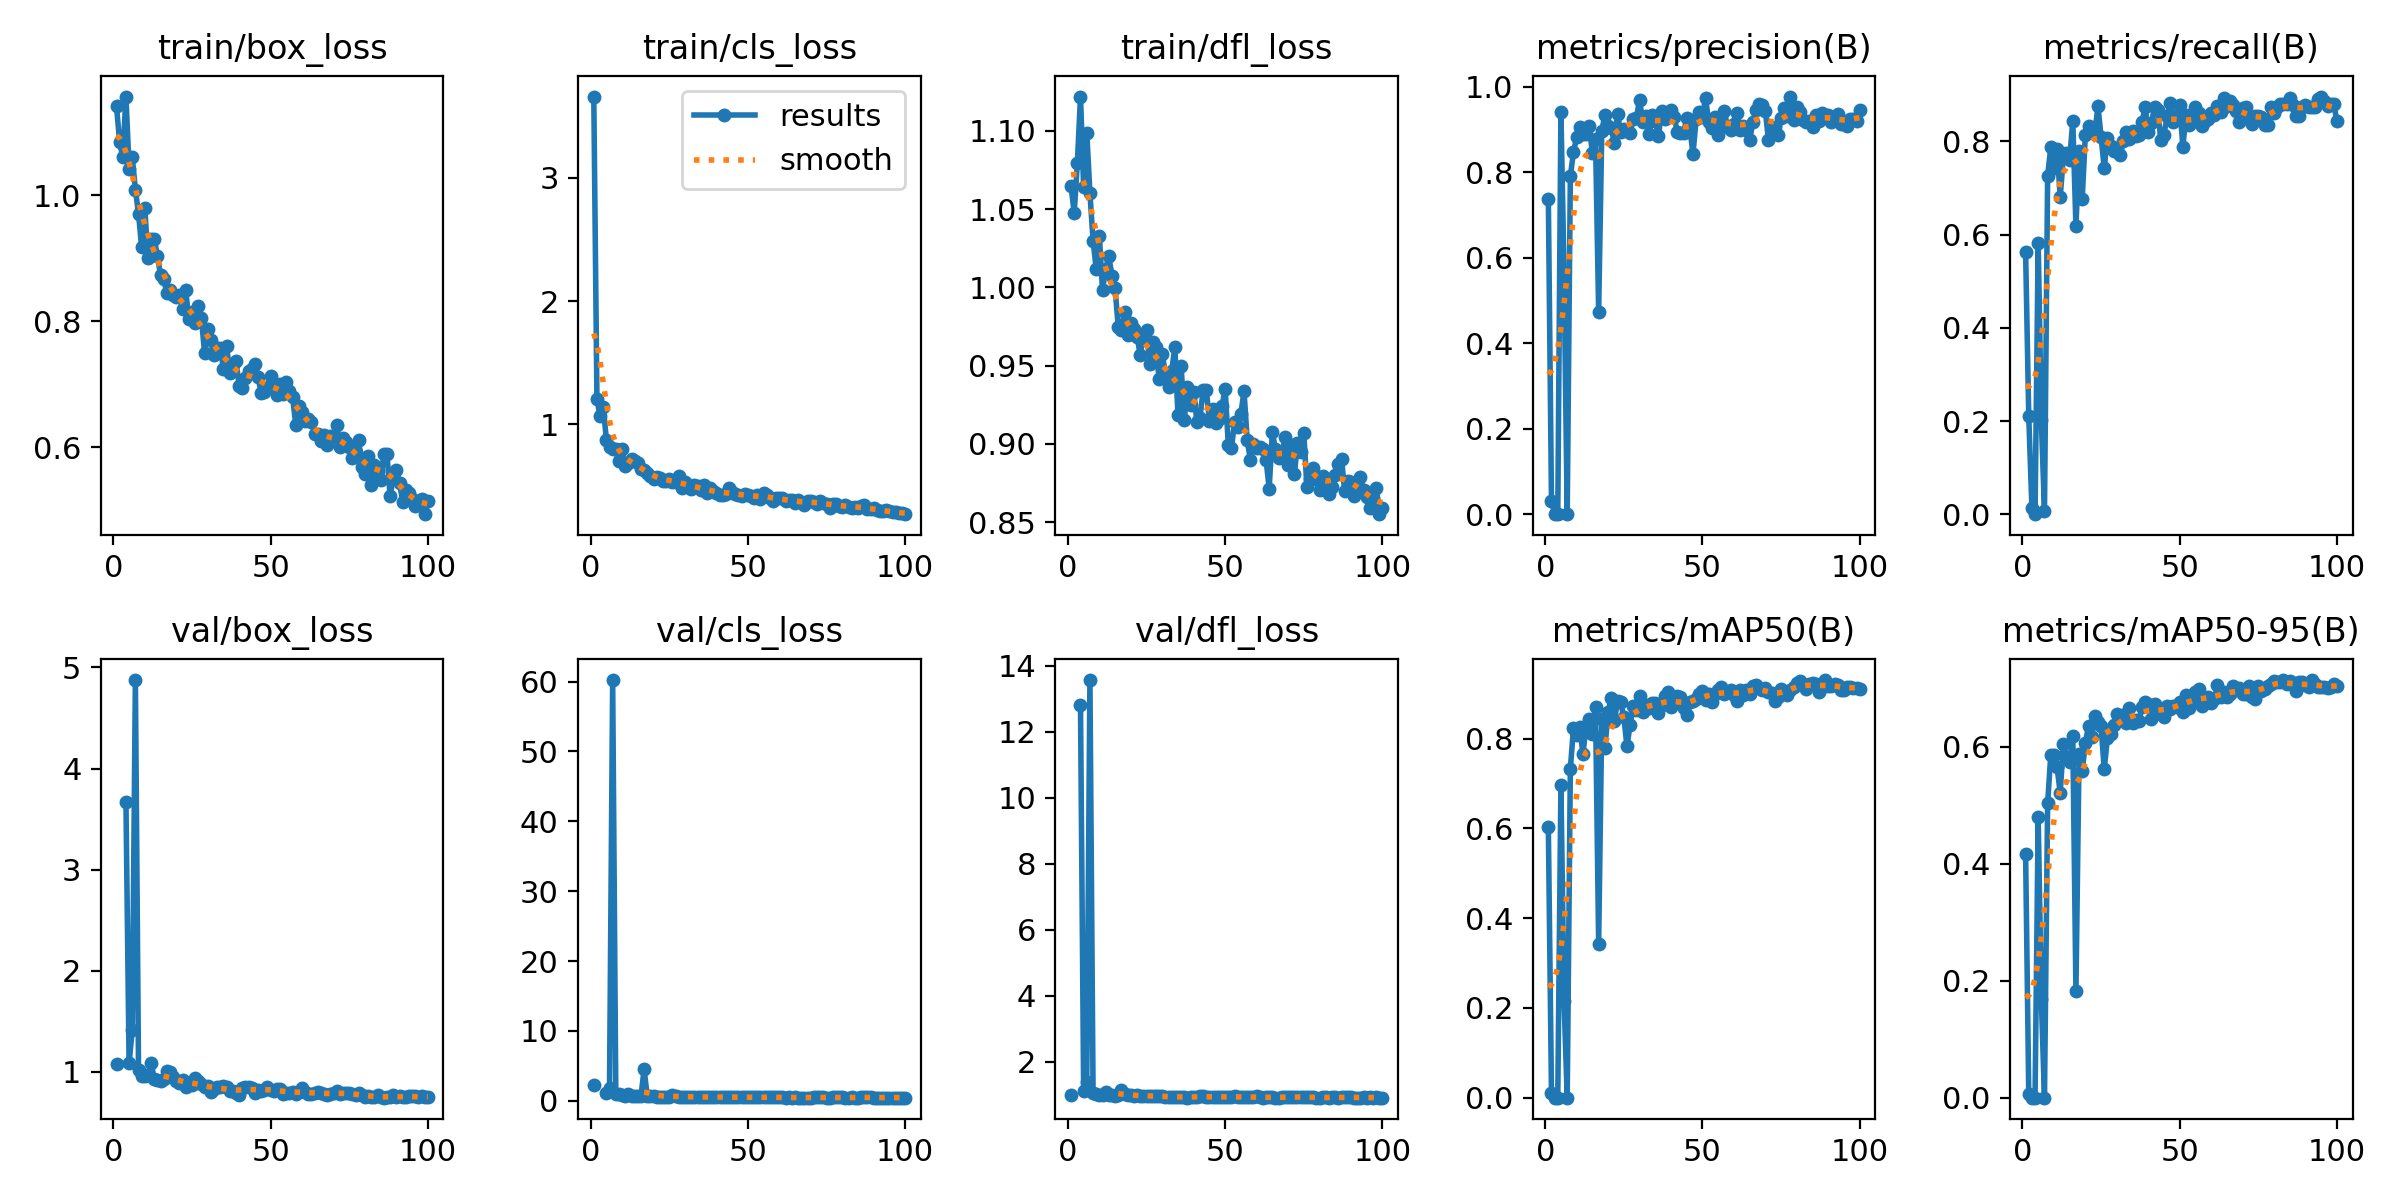

In [11]:
import os
from IPython.display import Image as IPyImage

# Path ke folder hasil training
train_folder = "runs/detect/yolov8m_tuned_lr0.01_m0.937"  # Sesuaikan jika path berbeda

# Path ke file results.png
results_image_path = os.path.join(train_folder, "results.png")

# Periksa keberadaan file dan tampilkan
if os.path.exists(results_image_path):
    display(IPyImage(filename=results_image_path, width=600))
else:
    print("File 'results.png' tidak ditemukan. Pastikan proses training selesai dan file tersedia.")


In [12]:
from ultralytics import YOLO

# Load model hasil training
model = YOLO("runs/detect/yolov8m_tuned_lr0.01_m0.937/weights/best.pt")

# Jalankan inferensi pada folder test
results = model.predict(source="/content/Deteksi-Shooting-basket-11/test/images", save=True)



image 1/65 /content/Deteksi-Shooting-basket-11/test/images/2_mp4-0007_jpg.rf.c50d8e04c5c44c5adfc637292629977f.jpg: 640x640 1 Basketball, 36.2ms
image 2/65 /content/Deteksi-Shooting-basket-11/test/images/2_mp4-0009_jpg.rf.dae8363a59687ed34abdebd3f28a2d5e.jpg: 640x640 1 Basketball, 34.0ms
image 3/65 /content/Deteksi-Shooting-basket-11/test/images/2_mp4-0011_jpg.rf.3b14dc8329870a55746c44080f943429.jpg: 640x640 (no detections), 32.7ms
image 4/65 /content/Deteksi-Shooting-basket-11/test/images/2_mp4-0025_jpg.rf.ef50d41096b536faccfd21daeb1014f1.jpg: 640x640 1 Basketball, 32.7ms
image 5/65 /content/Deteksi-Shooting-basket-11/test/images/2_mp4-0038_jpg.rf.1ca1d18eb48a23955391642020b913d8.jpg: 640x640 1 Basketball, 1 Basketball Hoop, 32.1ms
image 6/65 /content/Deteksi-Shooting-basket-11/test/images/2_mp4-0047_jpg.rf.b66d7d10aaaa84c25e8101dd5997cb7c.jpg: 640x640 2 Basketballs, 32.1ms
image 7/65 /content/Deteksi-Shooting-basket-11/test/images/2_mp4-0048_jpg.rf.553f649e151e562f4798c8ee68f3a970.jp

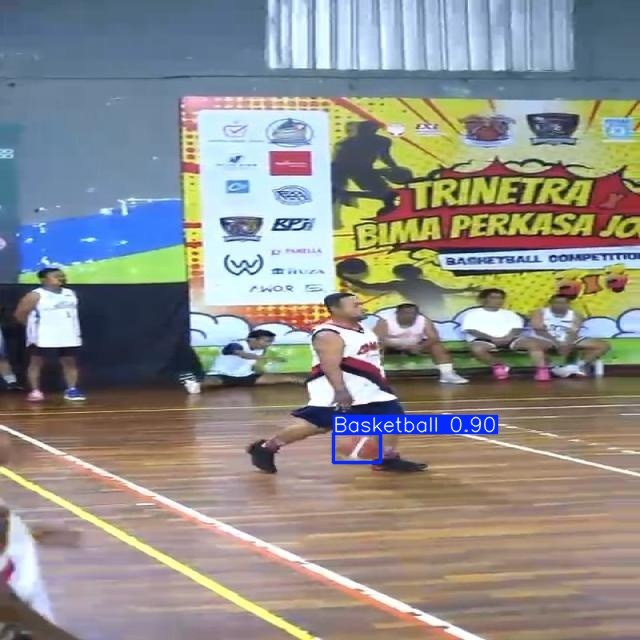

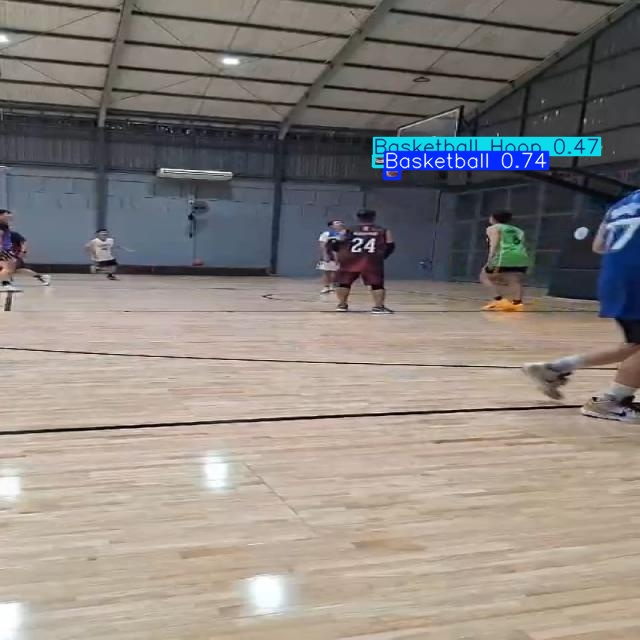

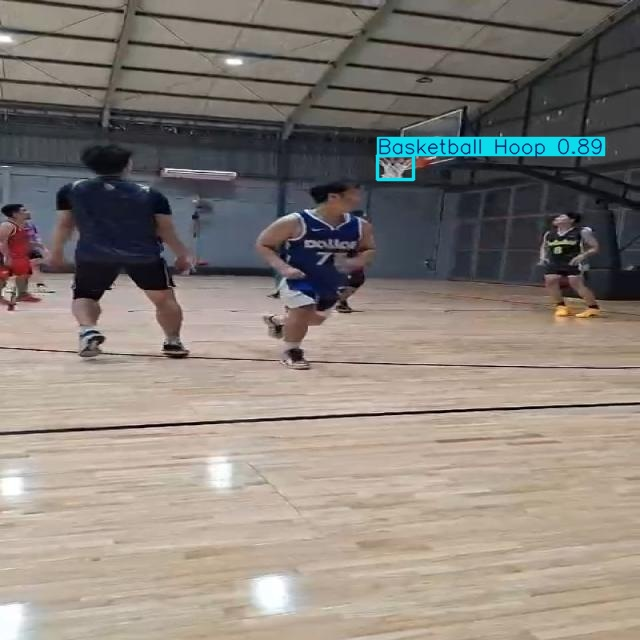

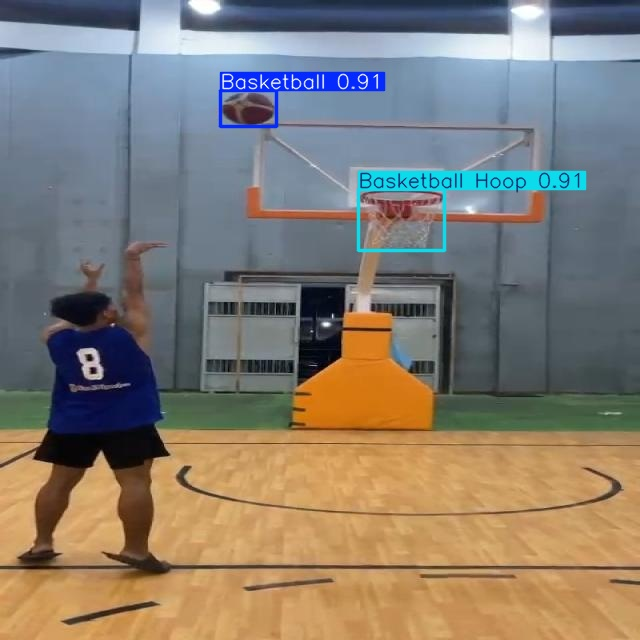

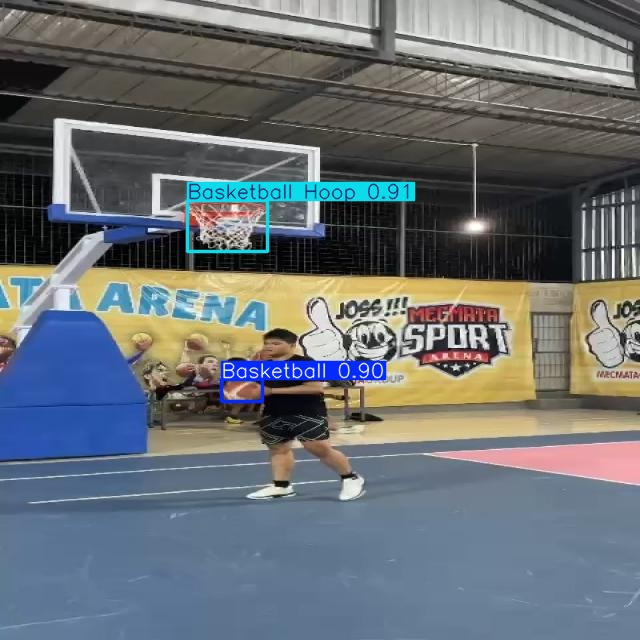

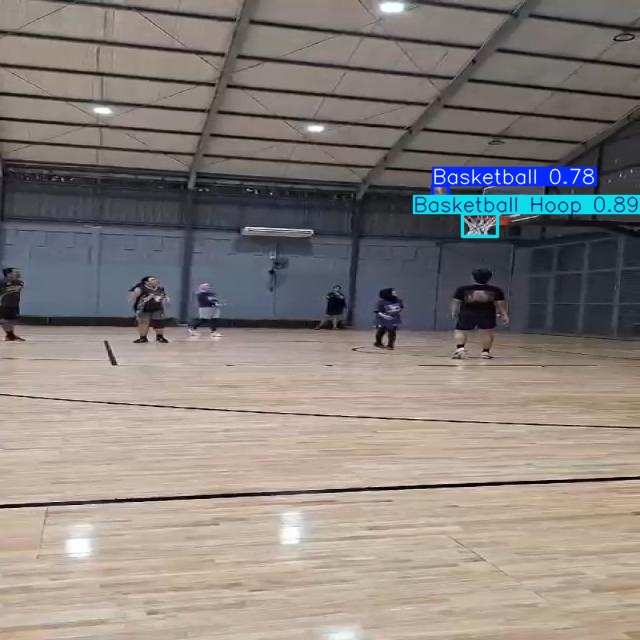

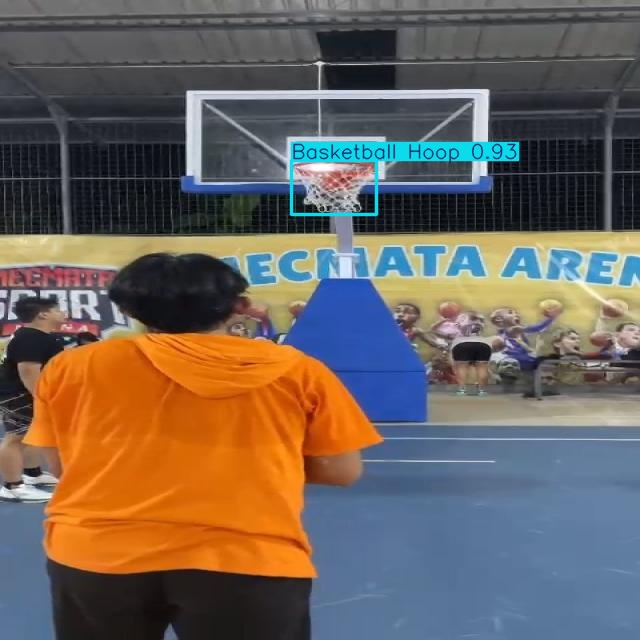

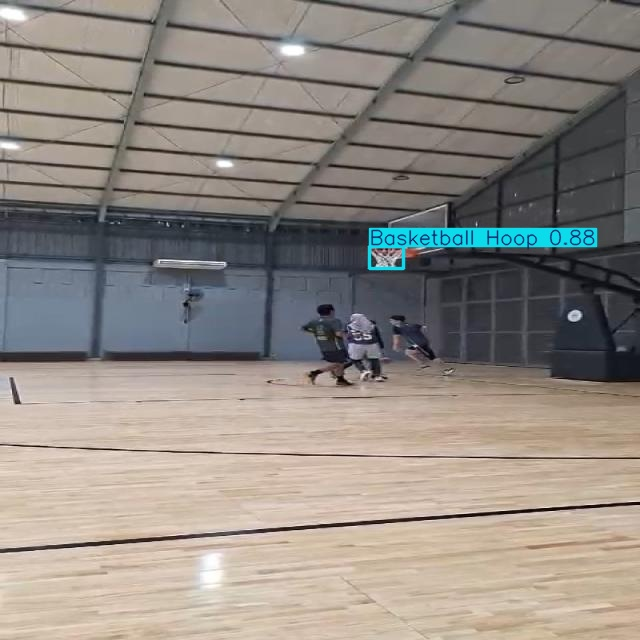

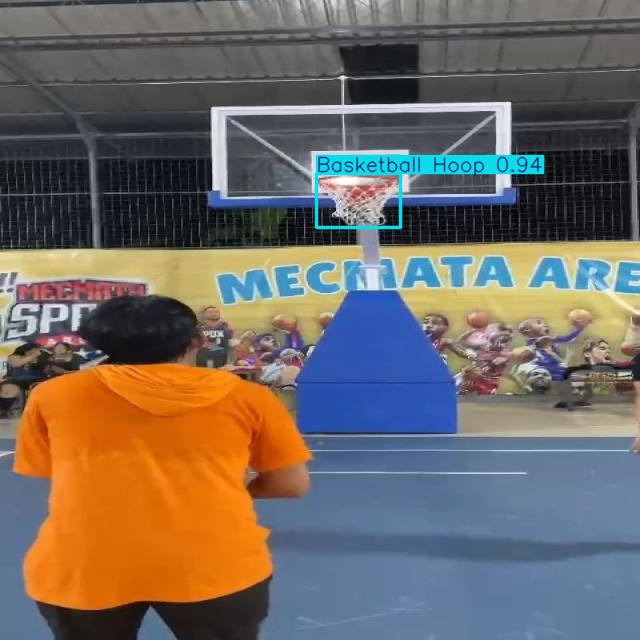

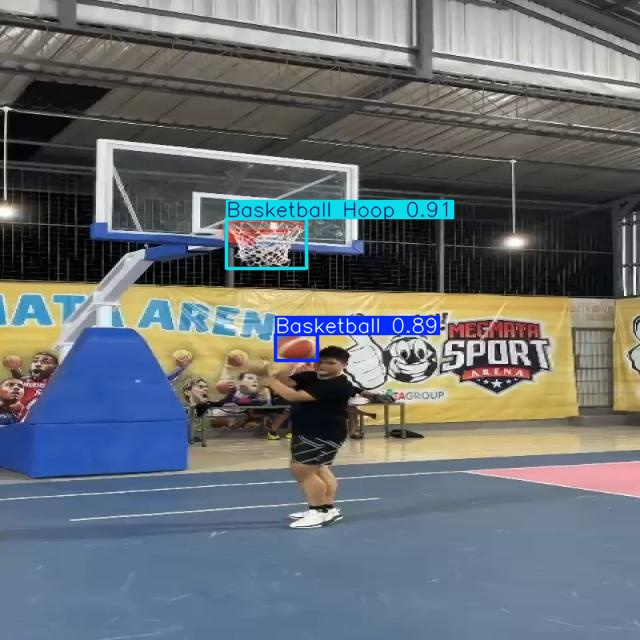

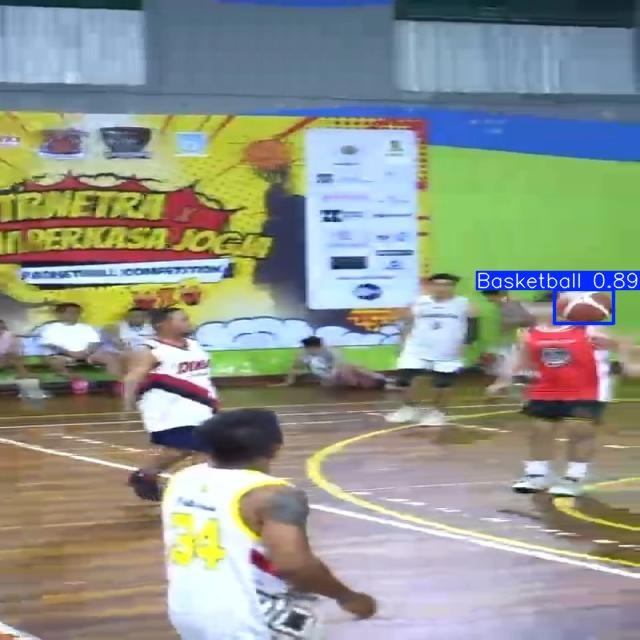

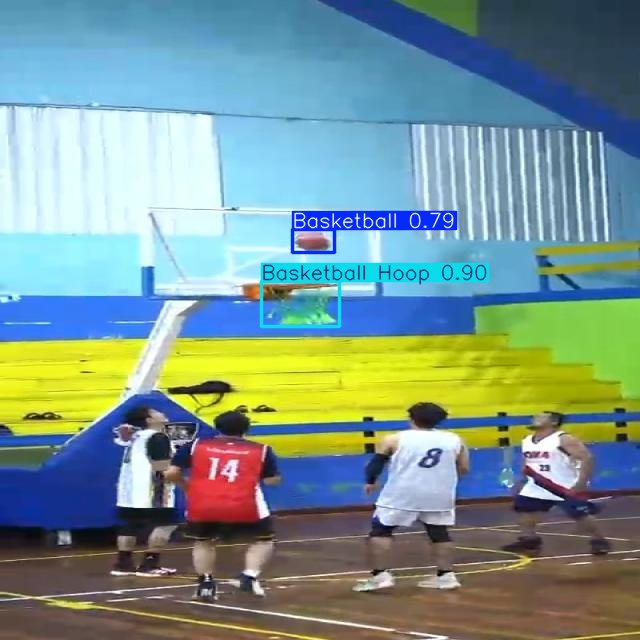

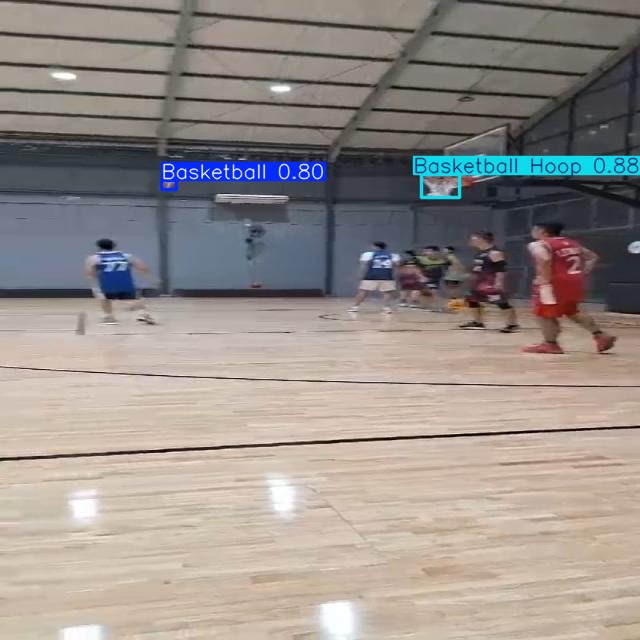

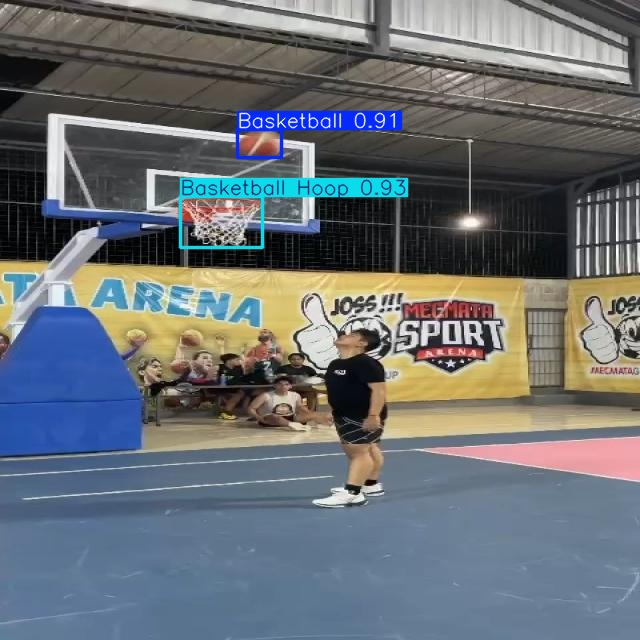

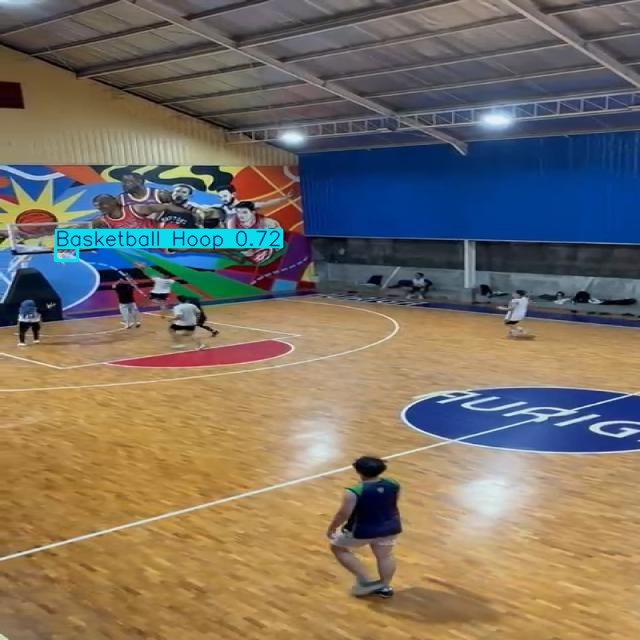

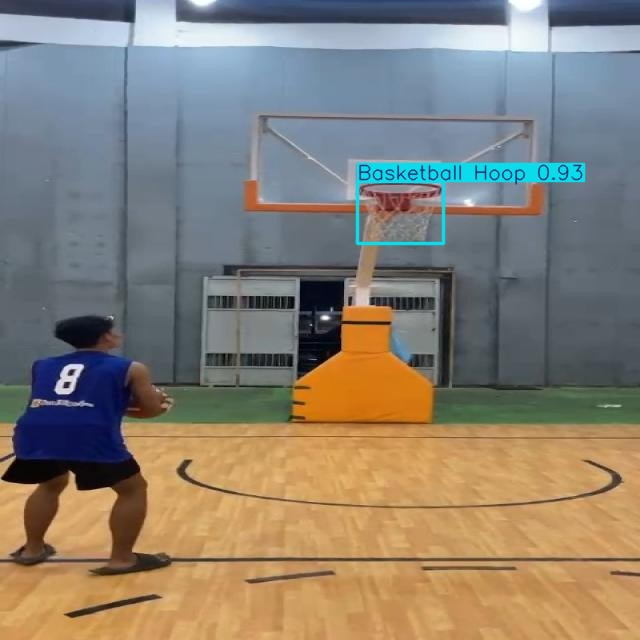

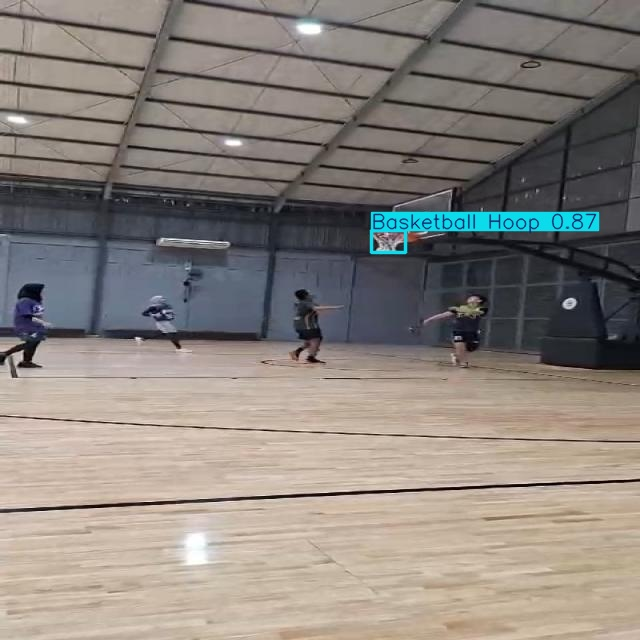

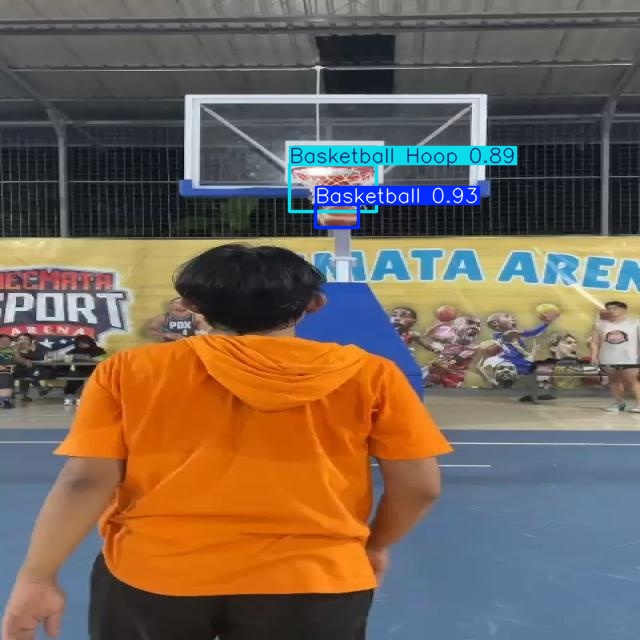

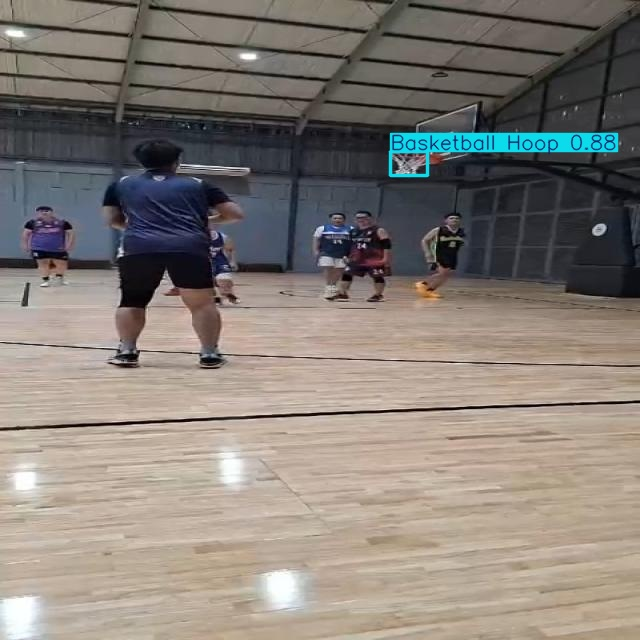

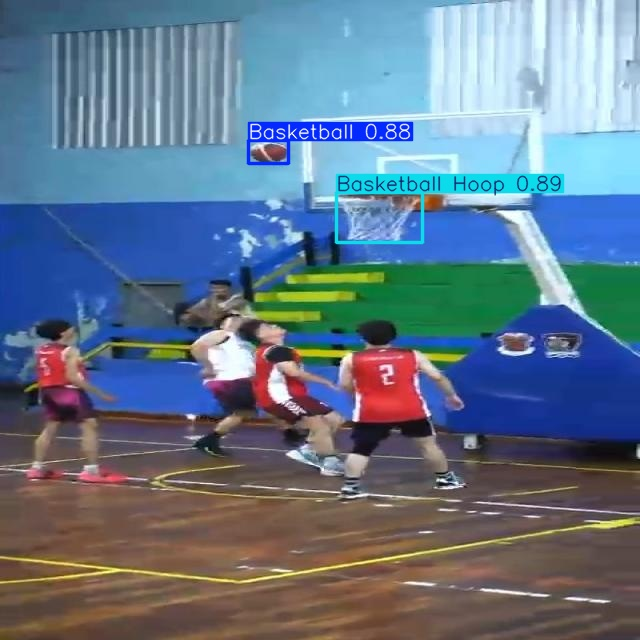

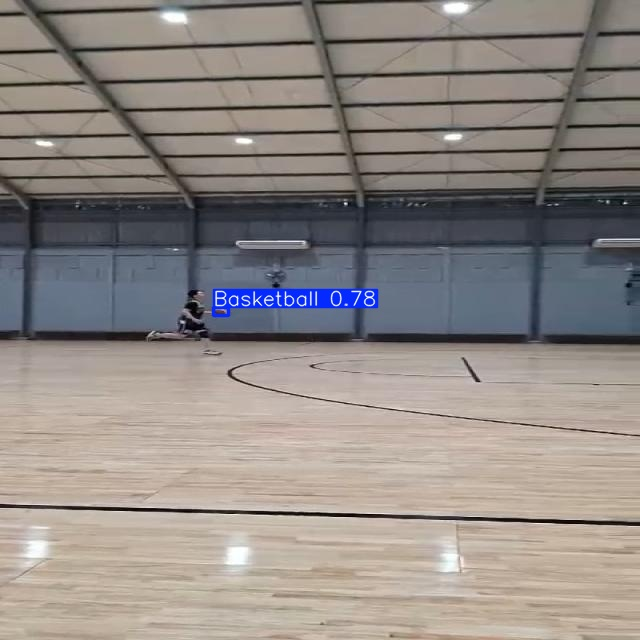

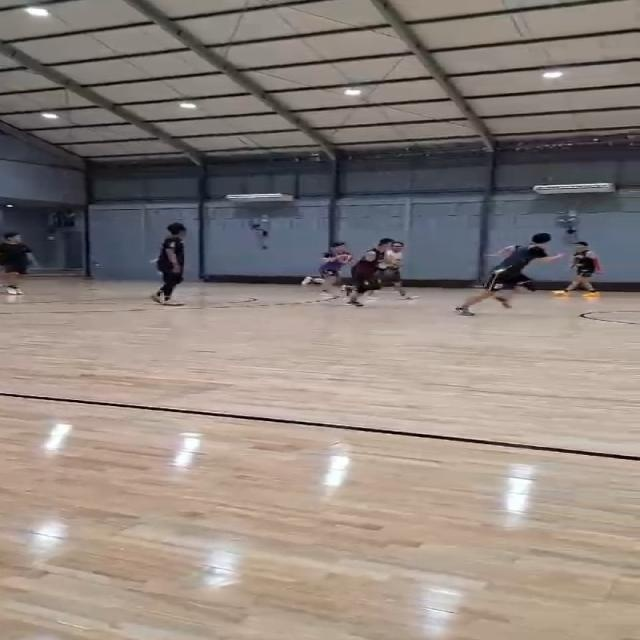

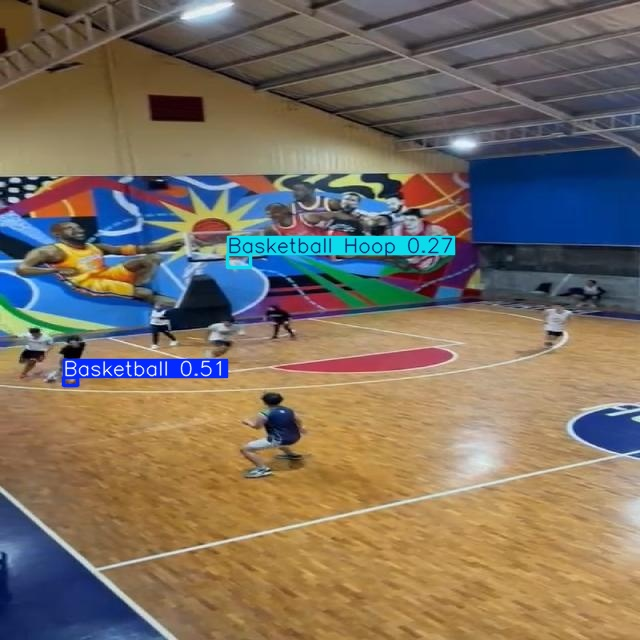

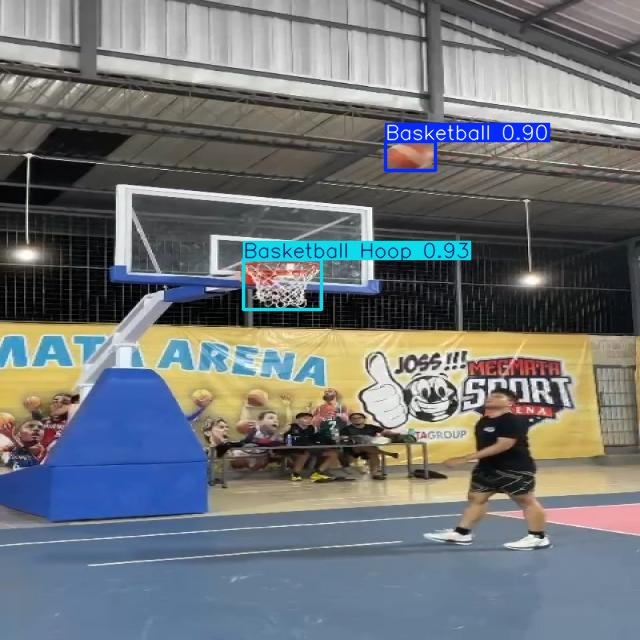

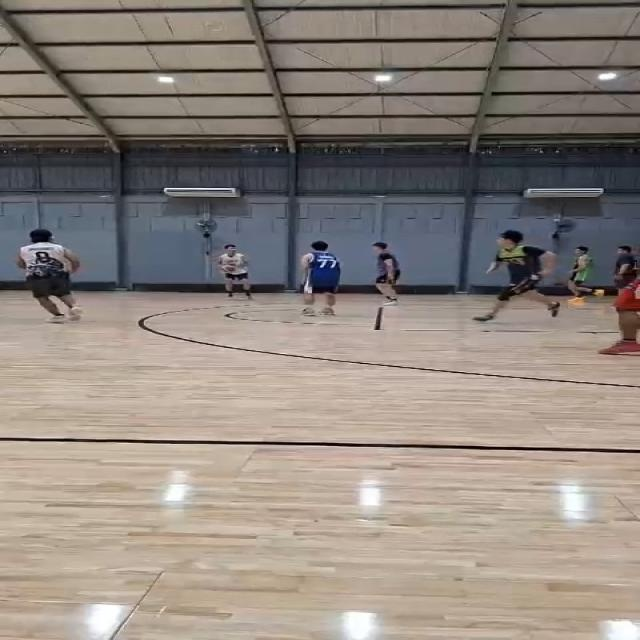

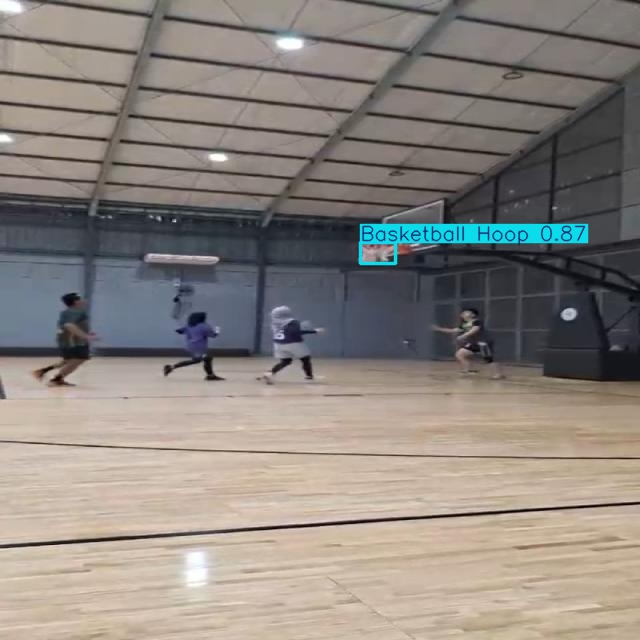

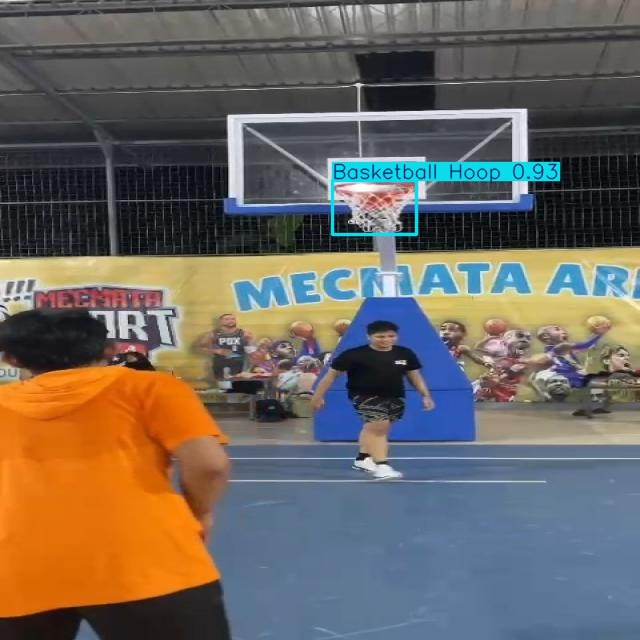

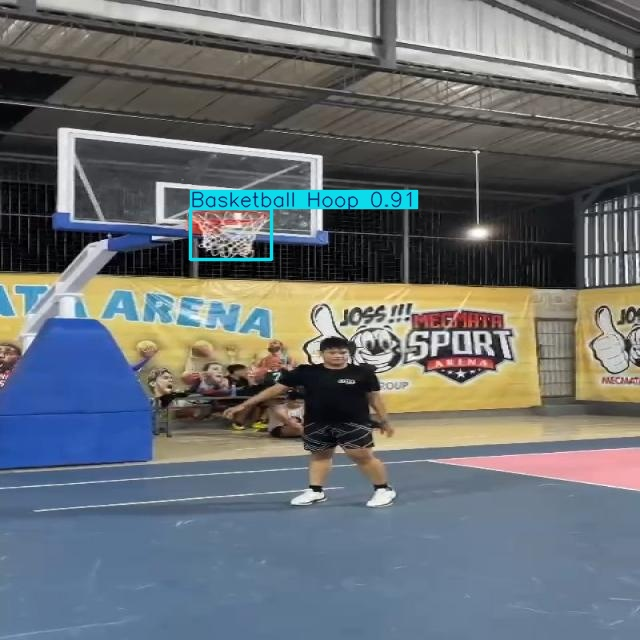

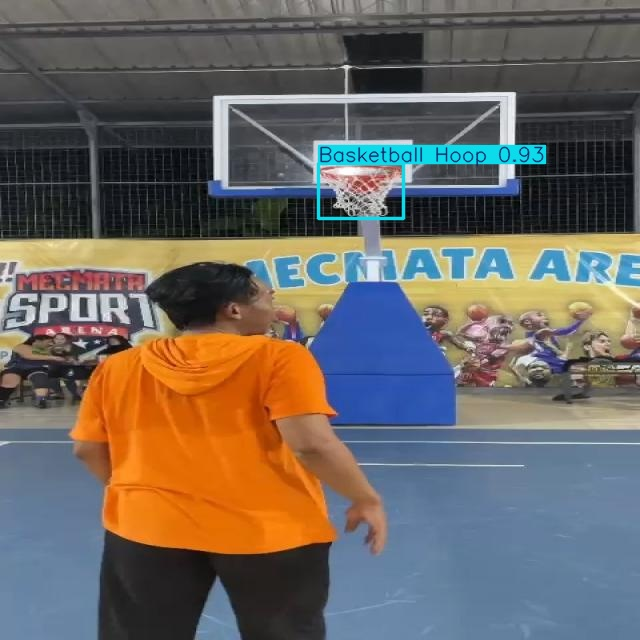

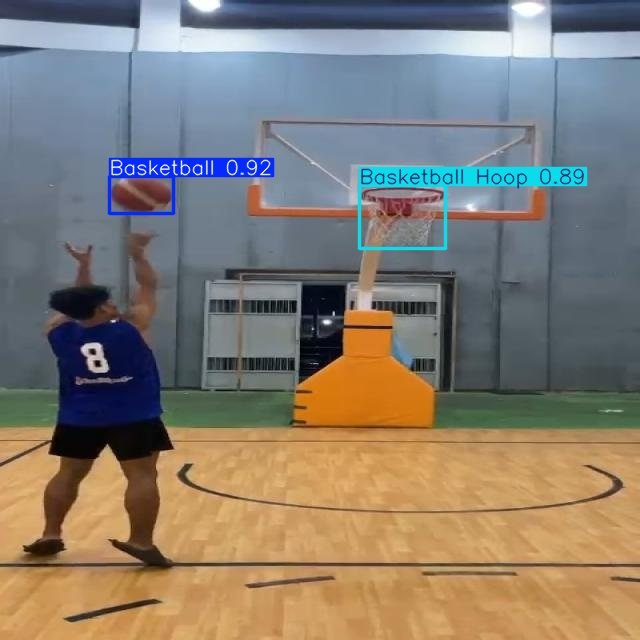

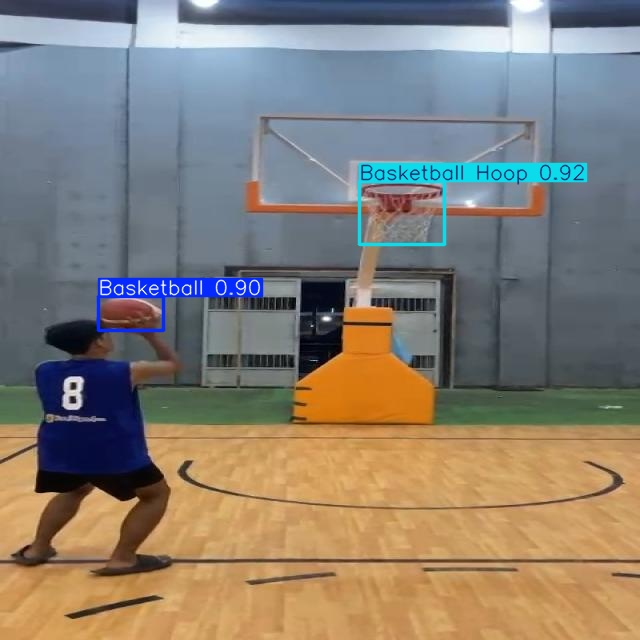

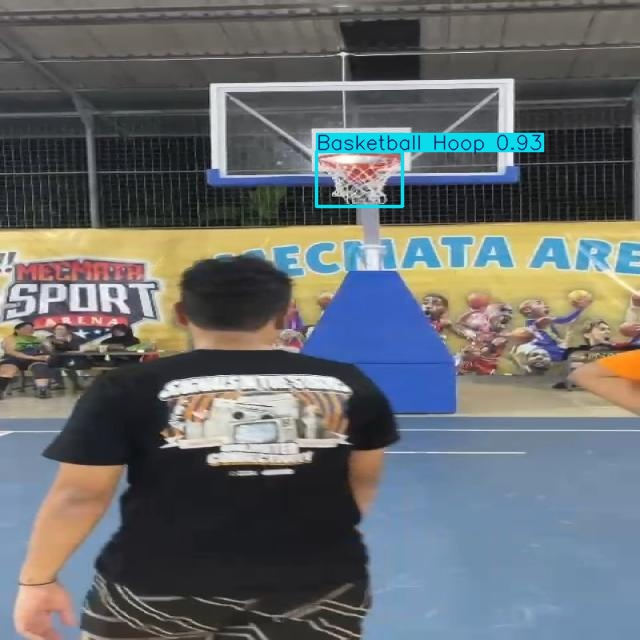

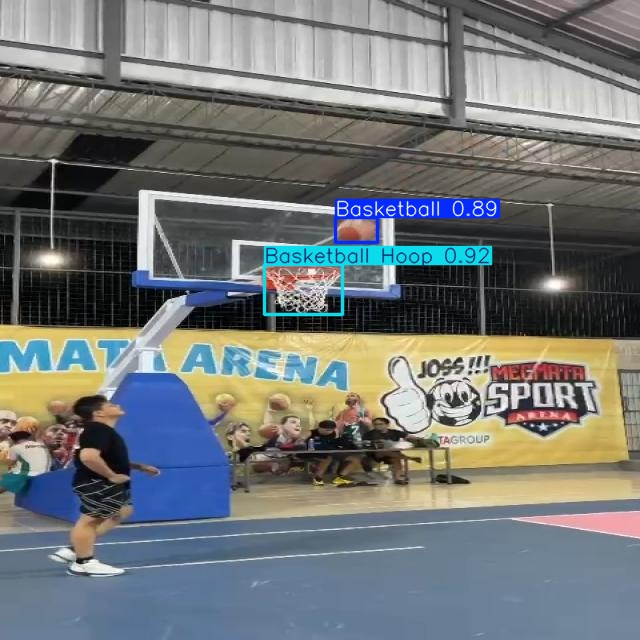

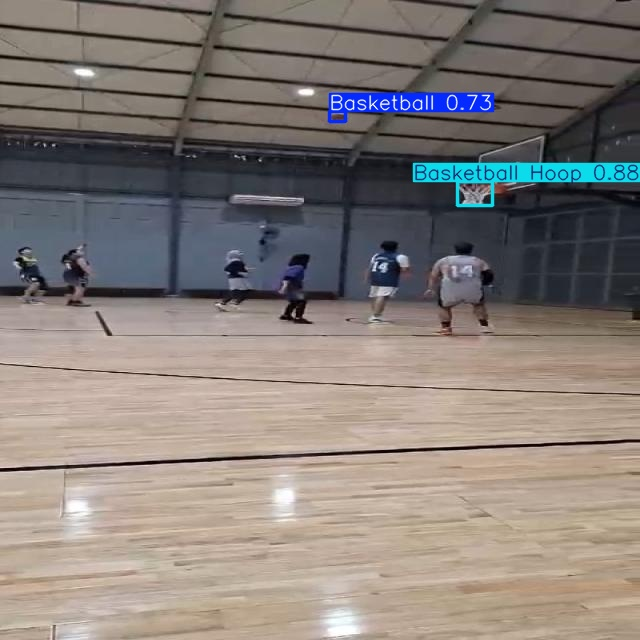

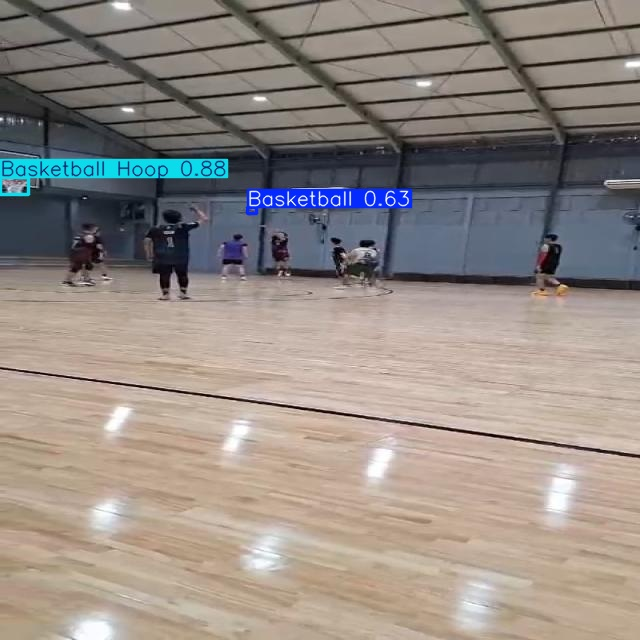

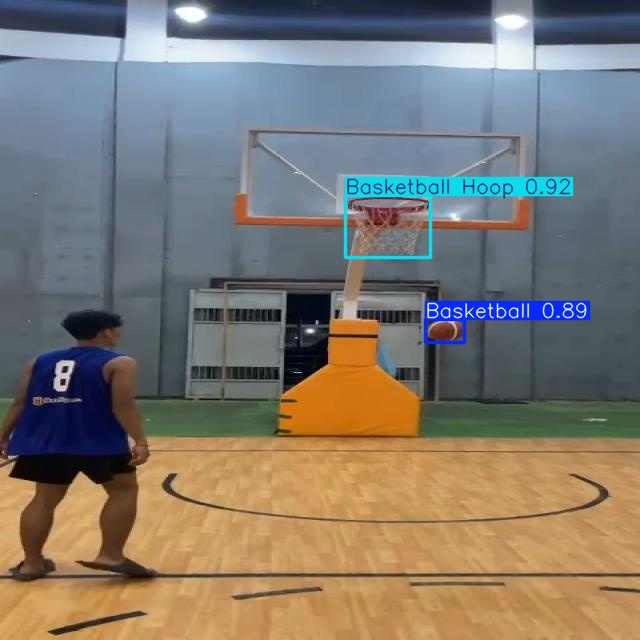

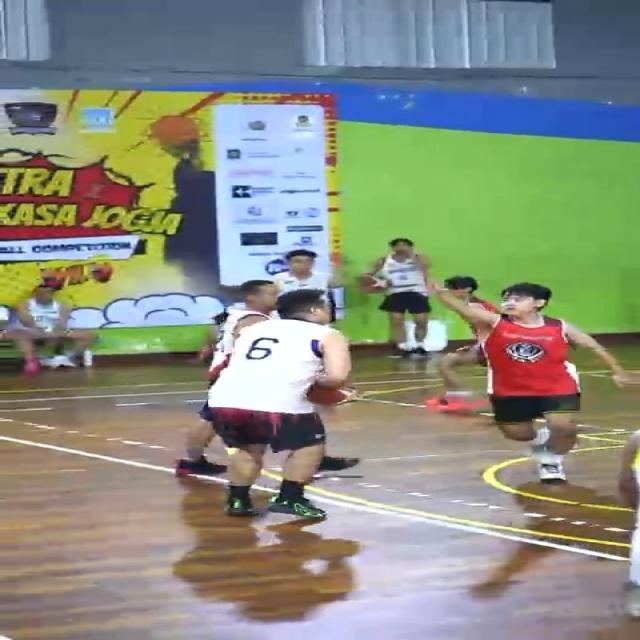

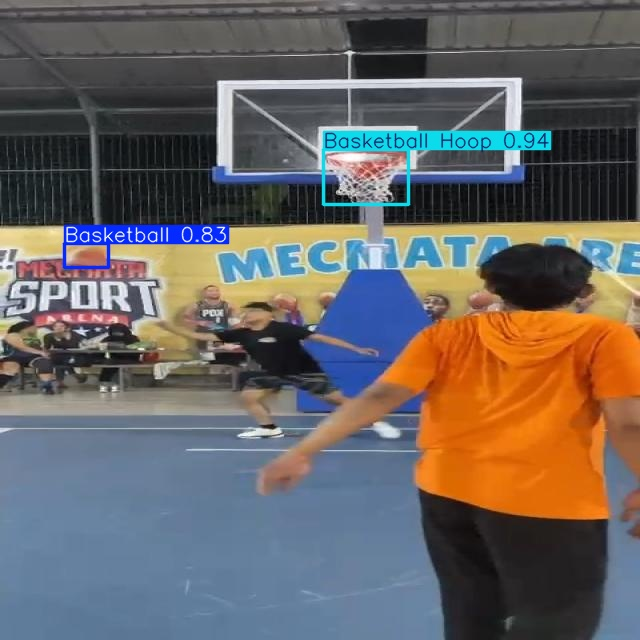

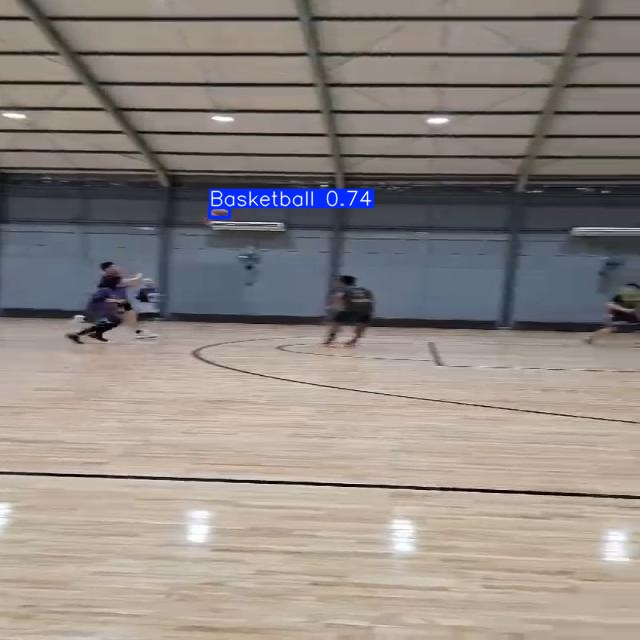

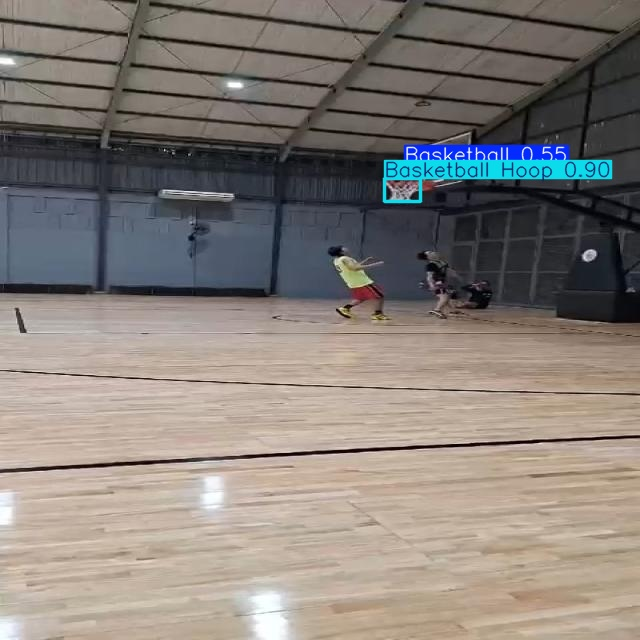

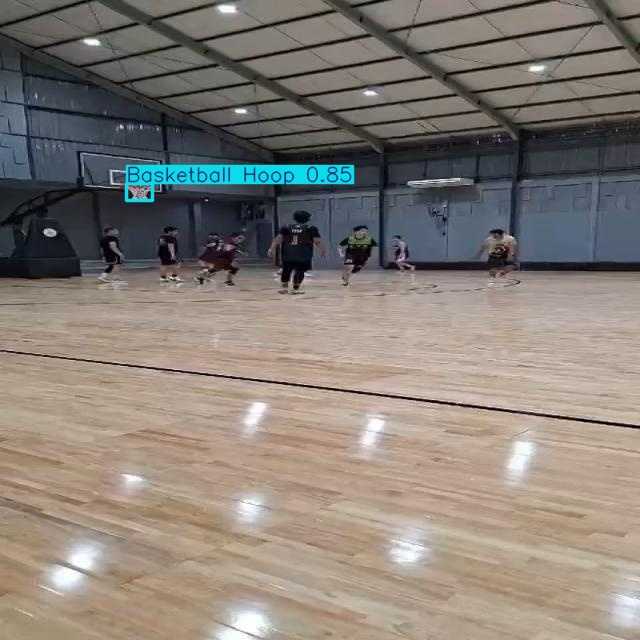

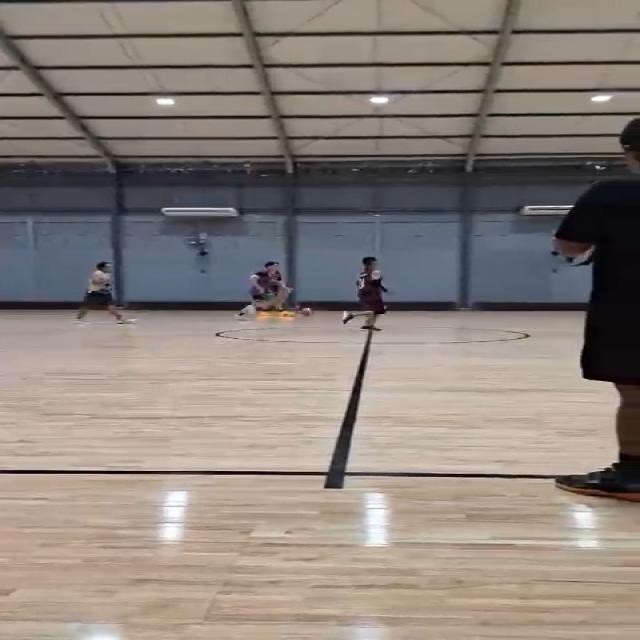

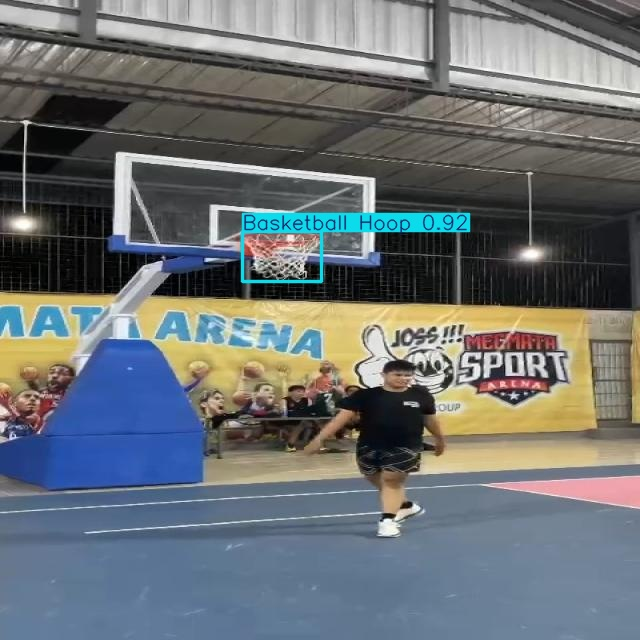

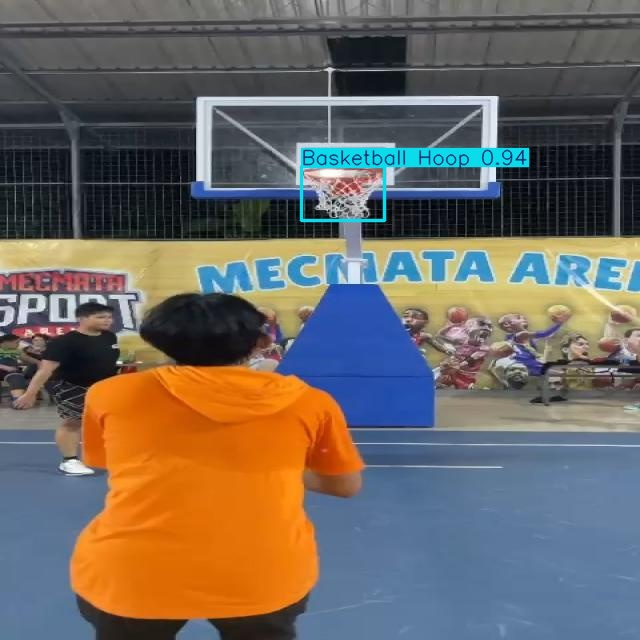

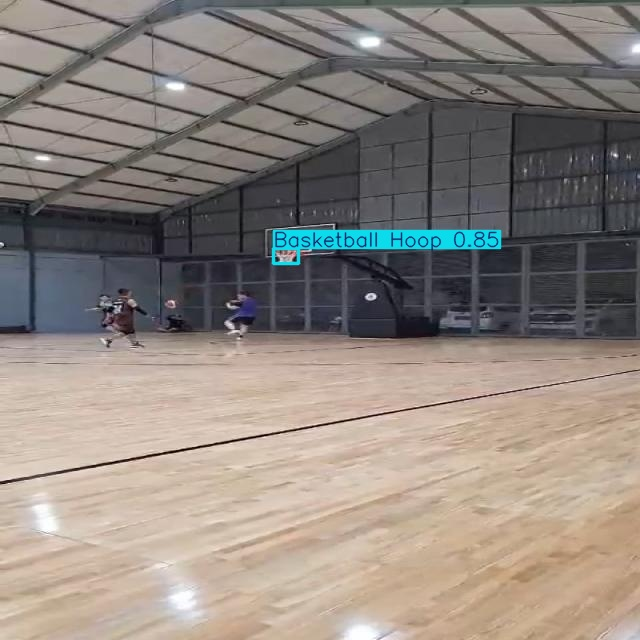

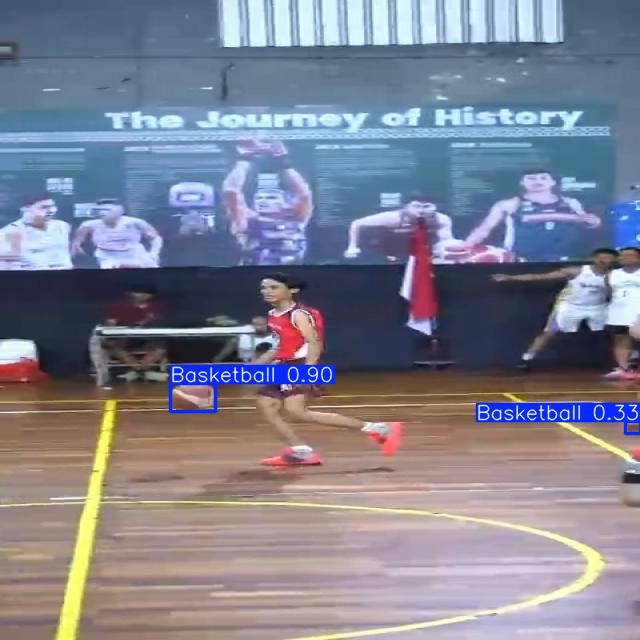

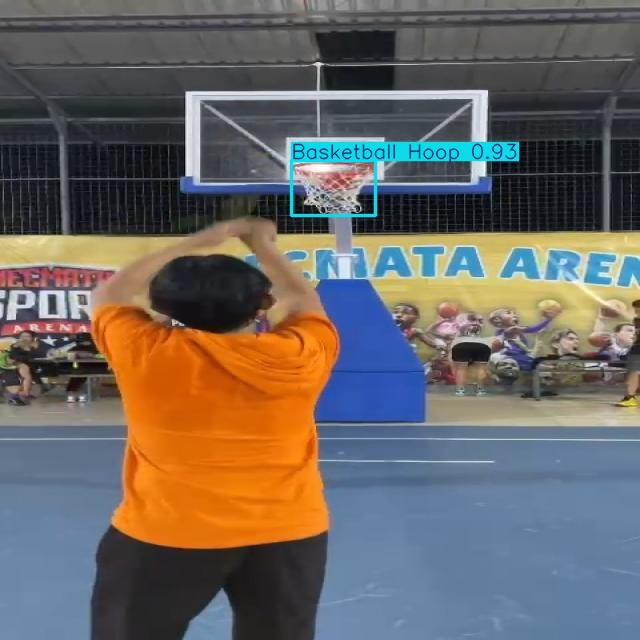

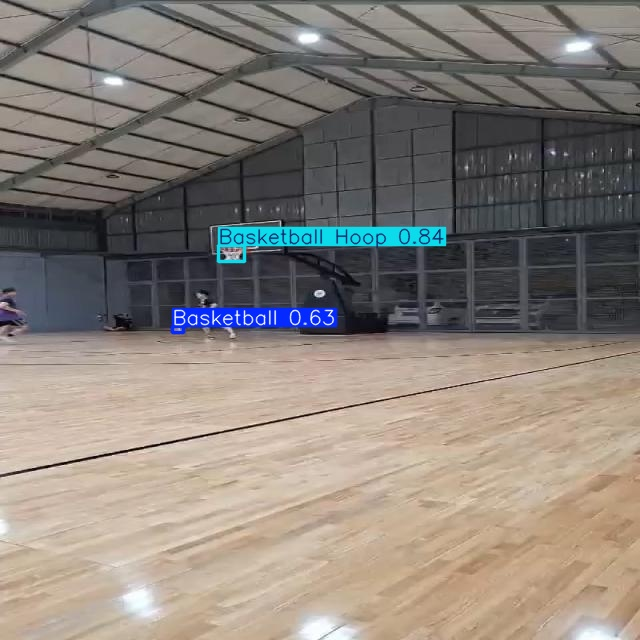

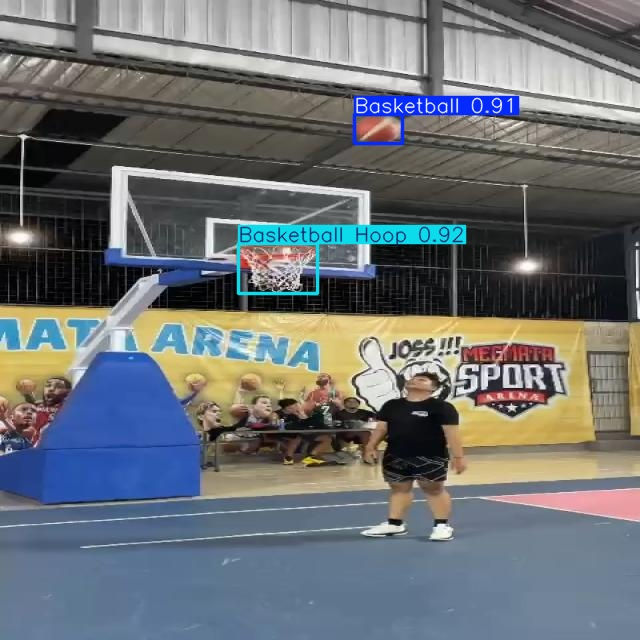

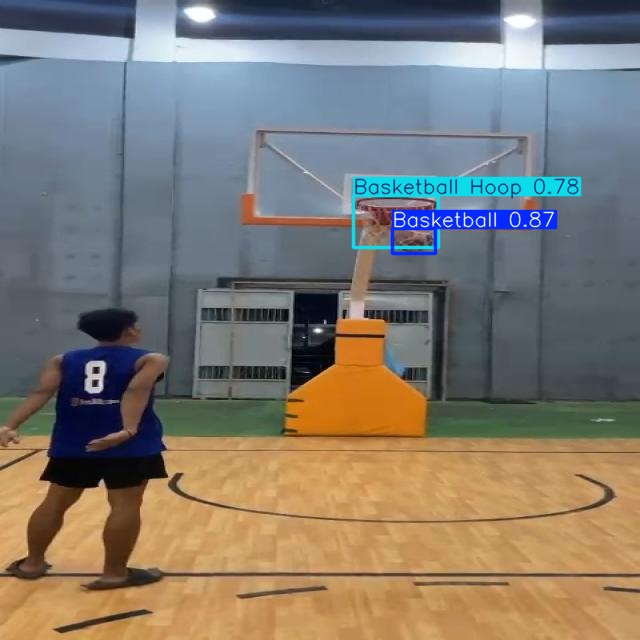

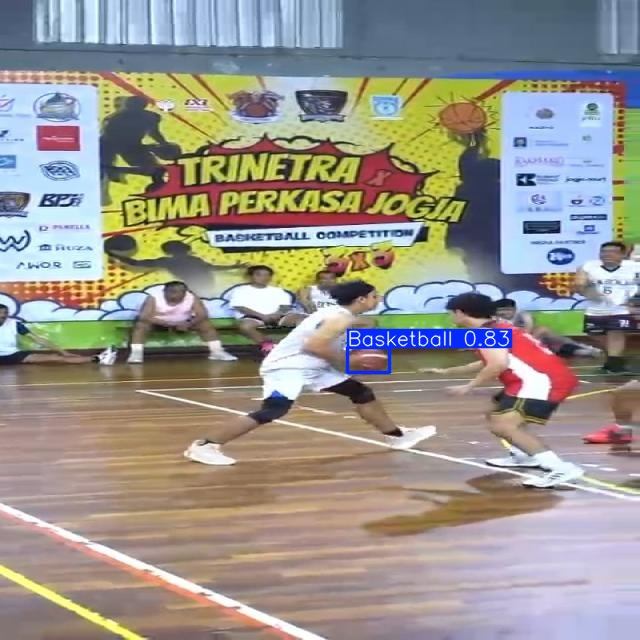

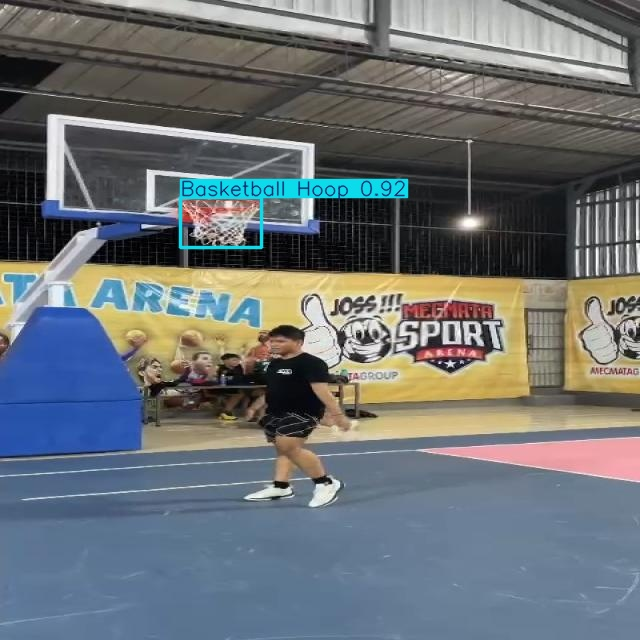

In [14]:
import os
from IPython.display import Image, display

# Path hasil prediksi
pred_path = "runs/detect/predict3/"

# Tampilkan semua gambar hasil prediksi
for img_file in os.listdir(pred_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):
        display(Image(filename=os.path.join(pred_path, img_file), width=800))
